In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [73]:
def dérivée (f, x, dx) :
    return (f(x +dx) - f(x - dx))/(2*dx)

In [103]:
def param_µ (alpha) :
    return alpha

def param_s (beta) :
    return beta

In [104]:
def grad (alpha, beta, r, dalpha=0.01, dbeta = 0.01) :
    x = dérivée(param_µ,alpha,dalpha) * (y - param_µ(alpha)) * (1 / (param_s(beta))**2)
    y = dérivée(param_s,beta,dbeta) * (1 / param_s(beta)) * (1 - r**2)
    return np.array([[x],[y]])

def natural_grad(alpha, beta, r, dalpha=0.01, dbeta=0.01) :
    x = (1/dérivée(param_µ,alpha,dalpha)) * (y - param_µ(alpha))
    y = (1/2) * (1/dérivée(param_s,beta,dbeta)) * (param_s(beta)) * (1 - r**2)
    return np.array([[x],[y]])

In [105]:
def ratio(alpha, beta, r, dalpha=0.01, dbeta=0.01) :
    R = (dérivée(param_s,beta,dbeta) / dérivée(param_µ,alpha,dalpha)) * (1-r**2)/r
    return ((2/math.pi)*np.arctan(R))**2

def natural_ratio(alpha, beta, r, dalpha=0.01, dbeta=0.01) :
    R = (1/2) * (dérivée(param_µ,alpha,dalpha)/dérivée(param_s,beta,dbeta)) * (1-r**2)/r
    return ((2/math.pi)*np.arctan(R))**2

In [113]:
def find_mids(list_ratio) :
    i1 = 0
    i2 = -1
    while list_ratio[i1] >= 0.5 :
        i1 += 1
    while list_ratio[i2] >= 0.5 :
        i2 -=1
    return i1, i2

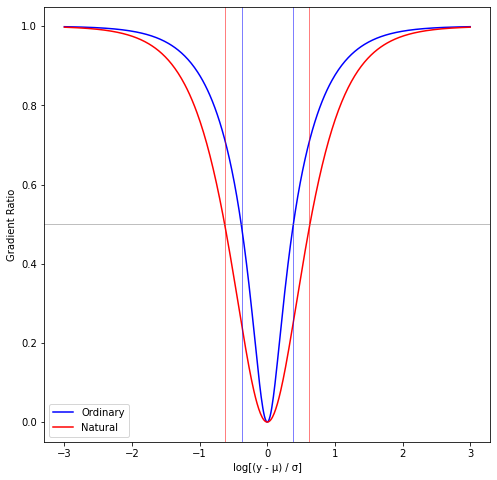

In [122]:
def param_µ (alpha) :
    return alpha

def param_s (beta) :
    return beta

def compare_ratio(alpha, beta) :
    list_r = np.linspace(-3,3,500)
    Ratio = np.array([ratio(alpha,beta,10**r) for r in list_r])
    mids_Ratio = find_mids(Ratio)
    NRatio = np.array([natural_ratio(alpha,beta,10**r) for r in list_r])
    mids_NRatio = find_mids(NRatio)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlabel('log[(y - µ) / σ]')
    ax.set_ylabel('Gradient Ratio')
    ax.plot(list_r,Ratio,label='Ordinary',color='blue')
    ax.plot(list_r,NRatio,label='Natural',color='red')
    ax.axvline(list_r[mids_NRatio[0]], color='red', linewidth=0.5)
    ax.axvline(list_r[mids_NRatio[1]], color='red', linewidth=0.5)
    ax.axvline(list_r[mids_Ratio[0]], color='blue', linewidth=0.5)
    ax.axvline(list_r[mids_Ratio[1]], color='blue', linewidth=0.5)
    ax.axhline(0.5,color='grey',linewidth=0.5)
    ax.legend()
    plt.show()

compare_ratio(0,1)

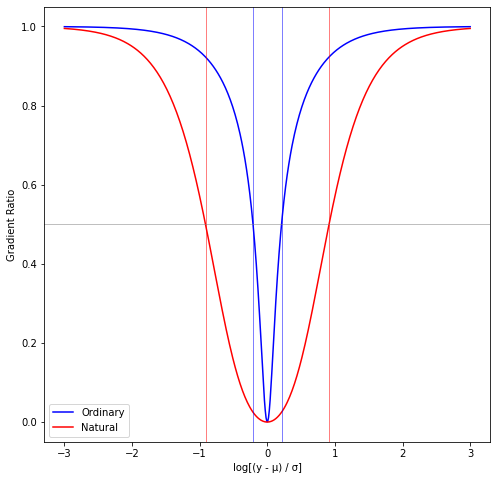

In [123]:
def param_µ (alpha) :
    return alpha

def param_s (beta) :
    return 2*beta

def compare_ratio(alpha, beta) :
    list_r = np.linspace(-3,3,500)
    Ratio = np.array([ratio(alpha,beta,10**r) for r in list_r])
    mids_Ratio = find_mids(Ratio)
    NRatio = np.array([natural_ratio(alpha,beta,10**r) for r in list_r])
    mids_NRatio = find_mids(NRatio)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlabel('log[(y - µ) / σ]')
    ax.set_ylabel('Gradient Ratio')
    ax.plot(list_r,Ratio,label='Ordinary',color='blue')
    ax.plot(list_r,NRatio,label='Natural',color='red')
    ax.axvline(list_r[mids_NRatio[0]], color='red', linewidth=0.5)
    ax.axvline(list_r[mids_NRatio[1]], color='red', linewidth=0.5)
    ax.axvline(list_r[mids_Ratio[0]], color='blue', linewidth=0.5)
    ax.axvline(list_r[mids_Ratio[1]], color='blue', linewidth=0.5)
    ax.axhline(0.5,color='grey',linewidth=0.5)
    ax.legend()
    plt.show()

compare_ratio(0,1)